In [ ]:
import pandas as pd
import numpy as np

data= pd.read_excel('TCM_Serie historica IQY.xlsx')
data

,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM)
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42
...,...,...
12001,2024-10-05,4173.66
12002,2024-10-06,4173.66
12003,2024-10-07,4173.66
12004,2024-10-08,4194.97


#PRONOSTICO POR SERIE DE TIEMPO
Pronostico por serie de tiempo, variación diaria, filtro (conocer por ejemplo el valor
del dolar en todo el mes de septiembre de 2013), encontrar el error del pronostico encontrado y gráficas ilustrativas.

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [ ]:
data.dtypes

,0
Fecha (dd/mm/aaaa),datetime64[ns]
Tasa de cambio representativa del mercado (TRM),float64


In [ ]:
#Filtro
dataSept_2013 = data[(data['Fecha (dd/mm/aaaa)'] >= '2013-09-01') & (data['Fecha (dd/mm/aaaa)'] <= '2013-09-30')]


In [ ]:
#Variación
dataSept_2013['Variación diaria'] = dataSept_2013['Tasa de cambio representativa del mercado (TRM)'].diff()
dataSept_2013

<ipython-input-11-391a0a7b2979>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSept_2013['Variación diaria'] = dataSept_2013['Tasa de cambio representativa del mercado (TRM)'].diff()


,Fecha (dd/mm/aaaa),Tasa de cambio representativa del mercado (TRM),Variación diaria
7949,2013-09-01,1935.43,NaN
7950,2013-09-02,1935.43,0.00
7951,2013-09-03,1935.43,0.00
7952,2013-09-04,1946.28,10.85
7953,2013-09-05,1938.99,-7.29
7954,2013-09-06,1952.11,13.12
7955,2013-09-07,1947.99,-4.12
7956,2013-09-08,1947.99,0.00
7957,2013-09-09,1947.99,0.00
7958,2013-09-10,1946.06,-1.93


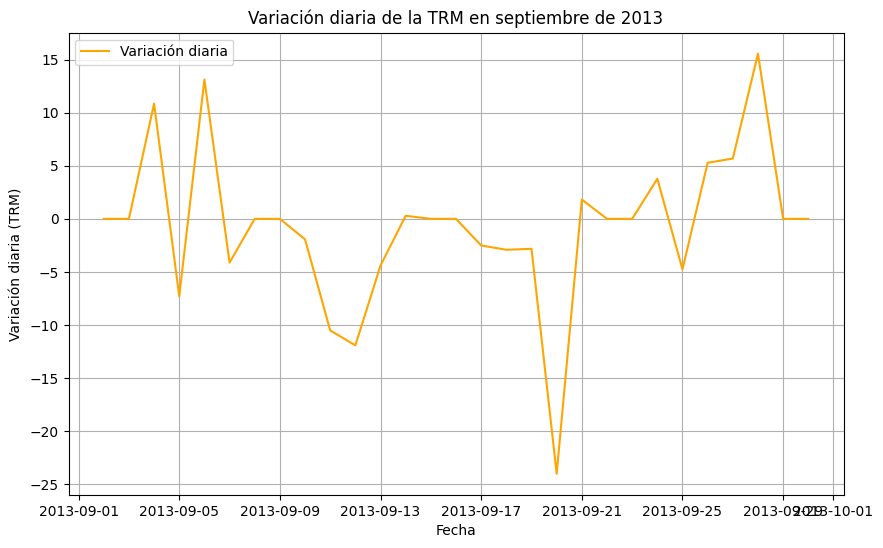

In [ ]:
# Graficar la variación diaria
plt.figure(figsize=(10, 6))
plt.plot(dataSept_2013['Fecha (dd/mm/aaaa)'], dataSept_2013['Variación diaria'], label='Variación diaria', color='orange')
plt.title('Variación diaria de la TRM en septiembre de 2013')
plt.xlabel('Fecha')
plt.ylabel('Variación diaria (TRM)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Crear el modelo ARIMA para pronóstico
model = ARIMA(dataSept_2013['Tasa de cambio representativa del mercado (TRM)'], order=(29, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

In [ ]:
# Hacer el pronóstico (en este caso, para 10 días hacia adelante)
forecast = model_fit.forecast(steps=10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Calcular el error del pronóstico (usar el MAE)
y_true = dataSept_2013['Tasa de cambio representativa del mercado (TRM)'][-10:].values
y_pred = forecast[:10]
mae = mean_absolute_error(y_true, y_pred)
mae

34.14159530539523

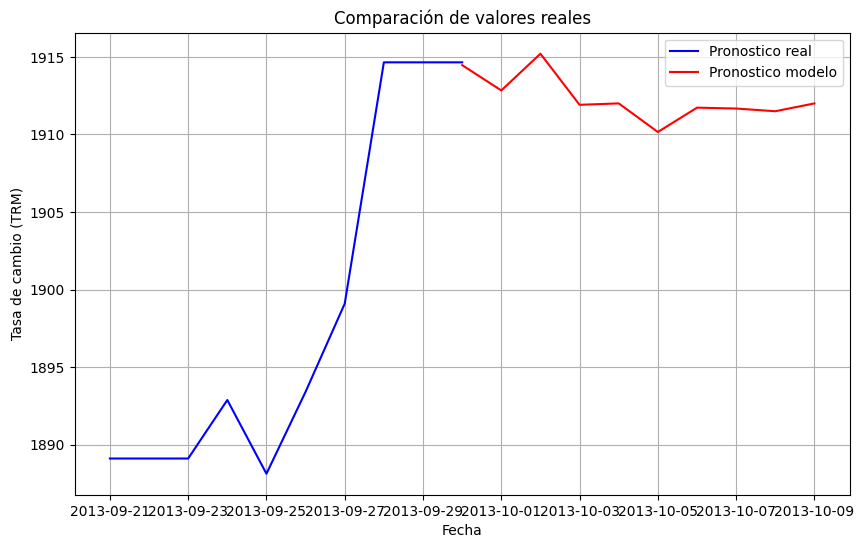

In [ ]:
fechas_reales = dataSept_2013['Fecha (dd/mm/aaaa)'][-10:].values
fechas_pred = pd.date_range(start=fechas_reales[-1], periods=29, freq='D')

plt.figure(figsize=(10, 6))
plt.plot(fechas_reales, y_true, label='Pronostico real', color='blue')
plt.plot(fechas_pred, y_pred, label='Pronostico modelo', color='red')
plt.title('Comparación de valores reales')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio (TRM)')
plt.legend()
plt.grid(True)
plt.show()


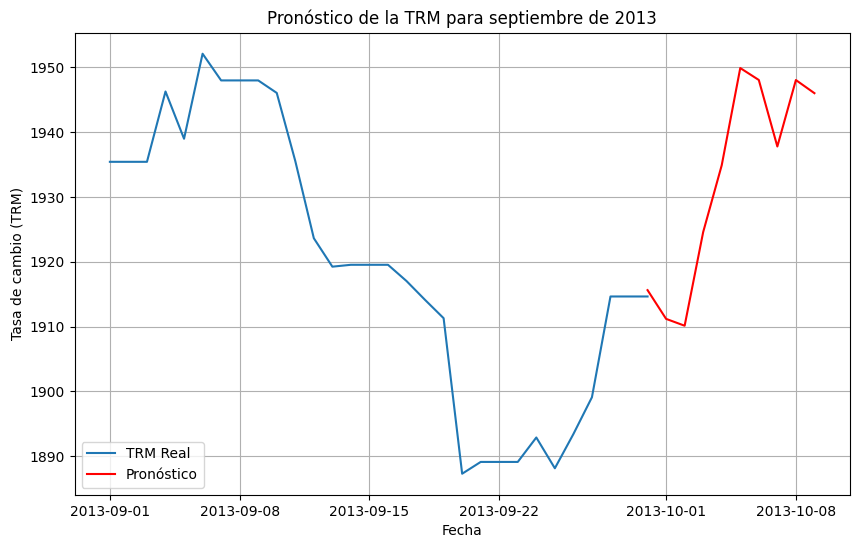

In [ ]:
# Graficar los resultados de la TRM
plt.figure(figsize=(10, 6))
plt.plot(dataSept_2013['Fecha (dd/mm/aaaa)'], dataSept_2013['Tasa de cambio representativa del mercado (TRM)'], label='TRM Real')
plt.plot(pd.date_range(start='2013-09-30', periods=10, freq='D'), y_pred, label='Pronóstico', color='red')
plt.title('Pronóstico de la TRM para septiembre de 2013')
plt.xlabel('Fecha')
plt.ylabel('Tasa de cambio (TRM)')
plt.legend()
plt.grid(True)
plt.show()